# IMDB Movie Data EDA

1.	[Problem Statement](#section1)

2.	[Data](#section2)

3.  [Pre-profile](#section3)

4.	[Pre processing of data (Clean, remove unnecessary, add relevant data)](#section4)

5.  [Post-profile](#section5)

6.	[Asking right Questions](#section6)
 - 6.1.  [What movies make the most money at the box office?](#section601)
       - 6.1.1.  [How runtime effect revenue?](#section60101)
       - 6.1.2.  [How Genre count and type effect Revenue?](#section60102)
 - 6.2.  [How much does a director matter?](#section602)
 - 6.3.  [Does industry grow over years](#section603)
       - 6.3.1  [How number of movies increasing over the years ?](#section60301)
       - 6.3.2  [How Revenue from movies increasing over the years ?](#section60302)
   
7.	[Conclusion or Summarization](#section7)

8.	[Actionable Insights](#section8)

## 1 Problem Statement  <a id='section1'></a>
In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. <strong> But what movies make the most money at the box office? How much does a director matter? </strong>

##  2 Data <a id='section2'></a>

> The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.  
>IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

> Users registered on this site are  invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.

> It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.

> Below is the data dictionary explaining the various columns of the dataset

| Columns | Description     |
|---------|-----------------|
|   Rank  | Movie rank order|
| Title   |The title of the film|
|Genre    | A comma-separated list of genres used to classify the film|
|Description|Brief one-sentence movie summary|
|Director   |The name of the film's director|
|Actors     |A comma-separated list of the main stars of the film|
|Year       |The year that the film released as an integer.|
|Runtime (Minutes)|The duration of the film in minutes.|
|Rating|User rating for the movie 0-10|
|Votes|Number of votes|
|Revenue (Millions) | Movie revenue in millions|
|Metascore|An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.|>

## 3 Pre - profile <a id='section=3'></a>

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import sys
import pandas_profiling
import matplotlib.pyplot as plt

### Loading movie dataset from github using read_csv and Github url. Also listing head part of dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
data.head() 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Installing pandas-profiling using the pip package manager by running

In [3]:
!{sys.executable} -m pip install pandas-profiling

### Generating panda profiling report before processing the data. Provided output file path of local system.

In [4]:

from pandas_profiling import ProfileReport
#profile = ProfileReport(data)
profile = data.profile_report(title="Movies Data profiling before Data Preprocessing")
profile.to_file(output_file="F:\Data Science & AI\Data Analysis with Python & EDA\Movies\movies_data_profiling_before_data_preprocessing.html")

> ##### After observering generated preprofiling report using panda profiling below are the warnings generated.

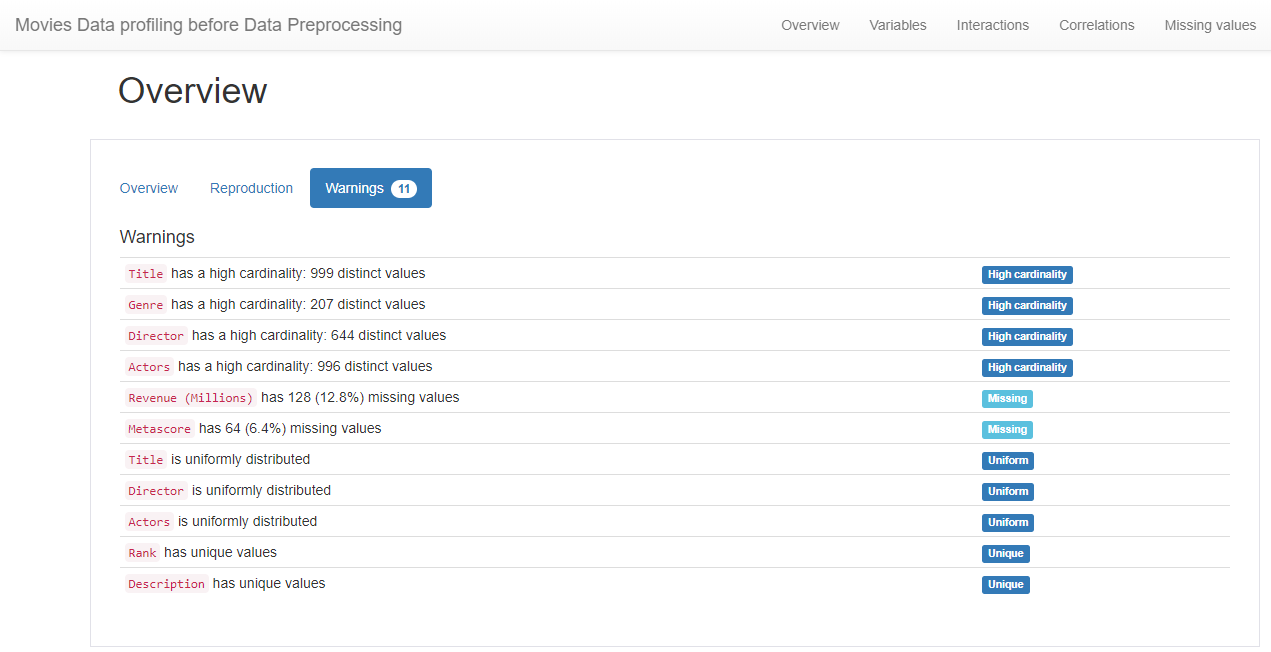

> ##### Here we have two important missing value warnings. Columns "Revenue (Millions)" and "Metascore" has missing values. Now lets see the count of missing values.

In [5]:
# Count the number of missing values in each column
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
# In the above task we got the number of missing values in "Revenue (Movies)" and "Metascore".
# In the Preprocessing profile report we see the 12.8% of data missing in  "Revenue (Movies)" and 6.4% in "Metascore"

In [7]:
#Also from the above preprocessing profile I see there are 999 unique Titles out of 1000 movies. Lets see the non unique values.
data.loc[data.Title.duplicated(keep=False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


In [8]:
#Well value "The Host" movie of "Title" colomn is same but they are from different years.
#As this is the only one value we can ignore

> ##### From the above observation the data set has missing values in two colomns which need to be correted. Now lets proceed with Pre processing the data.

## 4 Pre processing of data (Clean, remove unnecessary, add relevant data) <a id='section4'></a>

> ##### The data set doesnat have any unnecessary date to remove. Since the values is missing in two colomns "Revenue (Millions)" and "Metascore" around 12.8% and 6.4% of data missing respectively. Let try and find relevent data and add/replace cells with relevent data.

In [9]:
movies = pd.DataFrame(data)
pd.set_option('display.max_rows', None)
movies.median()

Rank                     500.500
Year                    2014.000
Runtime (Minutes)        111.000
Rating                     6.800
Votes                 110799.000
Revenue (Millions)        47.985
Metascore                 59.500
dtype: float64

In [10]:
#Since the missing values are more we can replcae the missing values with median. From the above reasult we can replace 
#Median of "Revenue (Millions)" 47.985 and Median of "Metascore" 59.500. Lets try it out.
movies=movies.fillna(movies.median())
movies.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,47.985,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010,41.0


> ##### We now replaced the missing values with the median of respective column values. Let verify if there are any missing values.

In [11]:
# Check if there are anymore missing values
movies['Revenue (Millions)'].isnull().any()

False

In [12]:
# Check if there are anymore missing values
movies.Metascore.isnull().any()

False

> ##### We can see there are no missing values in the data set. Now lets check the data types of colomn.

In [13]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

> ##### Seems like the data types of colomns are proper and no changes required.

In [14]:
# Since the values of colomn "Title" are unique lets now try and set colomn "Title" as index.
movies.set_index('Title', inplace=True)

In [15]:
# Also lets rename the long columns names like 'Runtime (Minutes) and 'Revenue (Millions)' to "Runtime", "Revenue" respective
# for ease of accessing columns
movies.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace=True)

In [16]:
# Lets check the head entries to see the changes effected or not.
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


> #### The changes are perfectly applied on the data set. Now the Movie Data set is ready for post profiling and Analysis.

## 5 Post Profile <a id='section5'></a>

In [17]:
##Lets create a post profile using preprocessed movies data frame.
#profile = ProfileReport(movies)
profile1 = movies.profile_report(title="Movies Data profiling after data preprocessing")
profile1.to_file(output_file="F:\Data Science & AI\Data Analysis with Python & EDA\Movies\movies_data_profiling_after_data_preprocessing.html")

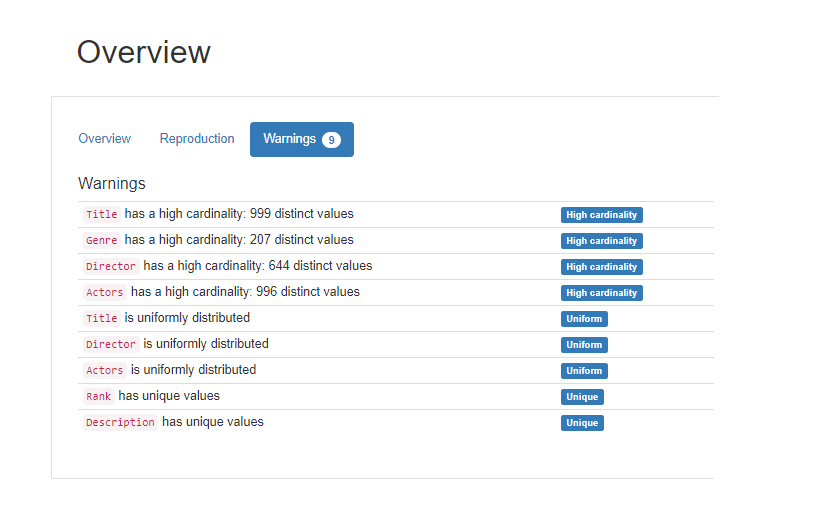

## 6 Asking Right Questions <a id='section6'></a>

#### 6.1 What movies make the most money at the box office? <a id='section601'></a>


###### 6.1.1 How runtime effect revenue? <a id='section60101'></a>

In [18]:
# Find out the percentiles of the Runtime column
movies.Runtime.describe()

count    1000.000000
mean      113.172000
std        18.810908
min        66.000000
25%       100.000000
50%       111.000000
75%       123.000000
max       191.000000
Name: Runtime, dtype: float64

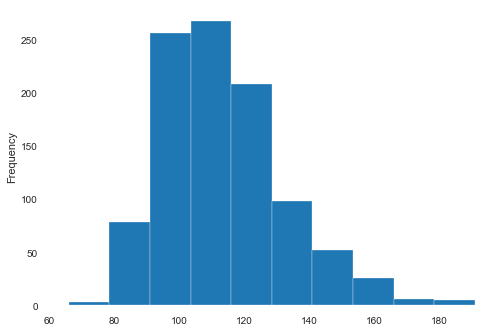

In [19]:
# Plot the distribution of the runtime column
movies.Runtime.plot.hist()

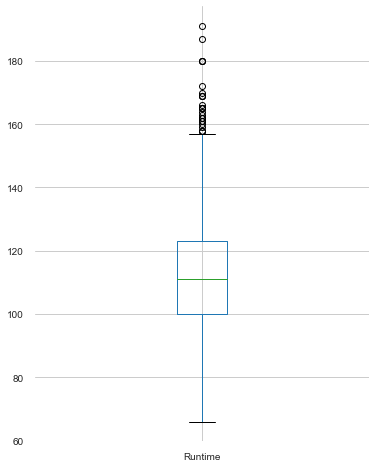

In [20]:
plt.rcParams['figure.figsize'] = (6, 8)
plt.rcParams['font.size'] = 12
boxplot = movies.boxplot(column=['Runtime'])

> ##### Classifying the Runtime into different levels based on the output from the describe method
> | Runtime(in minutes) | Level     |
|---------|-----------------|
|   66-100  | Short|
| 100-111   |Medium|
| 111-123   | Moderately Long|
| 123-187   | Long|

In [21]:
# Use the Pandas cut method to map the Runtime into the above levels
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
movies['Runtime_levels'] = pd.cut(movies.Runtime, runtime_bin_edges, labels=runtime_bin_names)
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Runtime_levels
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Moderately Long
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Moderately Long


In [22]:
# Find out the Runtime level that receives the highest mean Revenue, mean Rating and mean Metascore
runtime_stats = movies.groupby('Runtime_levels')['Revenue', 'Rating', 'Metascore'].mean()
runtime_stats

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Revenue,Rating,Metascore
Runtime_levels,,,
Short,57.173818,6.310909,56.710909
Medium,65.321980,6.588163,55.532653
Moderately Long,65.585665,6.853648,59.287554
Long,128.353367,7.188980,64.728571


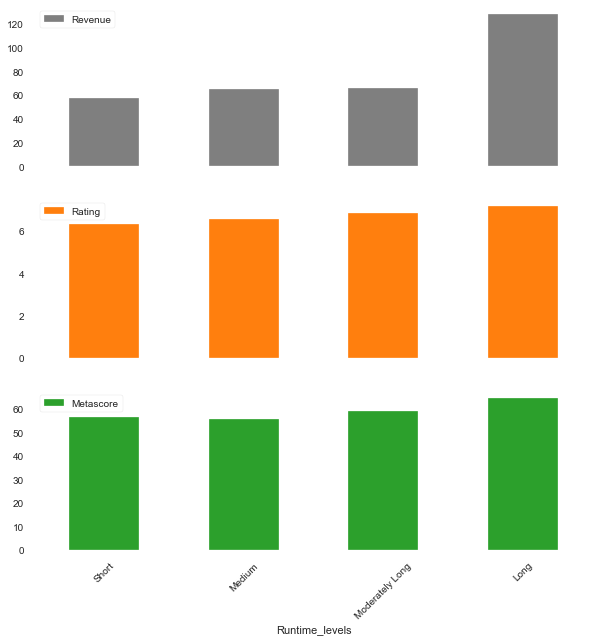

In [23]:
# Plotting the result in the form of a bar chart
ax1, ax2, ax3 = runtime_stats.plot.bar(subplots=True, color = ('tab:Gray', 'tab:Orange', 'tab:Green'));
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_title("")
ax2.set_title("")
ax3.set_title("")
ax3.set_xticklabels(runtime_stats.index, rotation = 45);

> ##### 1. It was observed that movies having Long Runtimes (greater than 123 minutes) earn higher Revenue, are more popular and are critically acclaimed.
> ##### 2. As the Runtime increases the movies tends to earn higher Revenue, higher popularity and critical acclaim.
> ##### 3. It should be noted that, movies with Runtime (greater than 123 minutes) beats other movies in terms of Revenue by a significant margin.

##### 6.1.2 How Genre count and type effect Revenue? <a id='section60102'></a>

In [24]:
# The Genre column contains Genre combination as string separated by comma
movies['Genre_count'] = movies.Genre.str.split(',').str.len()

In [25]:
genre_count_stats = movies.groupby('Genre_count')['Revenue', 'Rating', 'Metascore'].mean()
genre_count_stats

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Revenue,Rating,Metascore
Genre_count,,,
1,47.460524,6.359048,58.880952
2,54.829255,6.686809,58.729787
3,91.836076,6.794091,59.142424


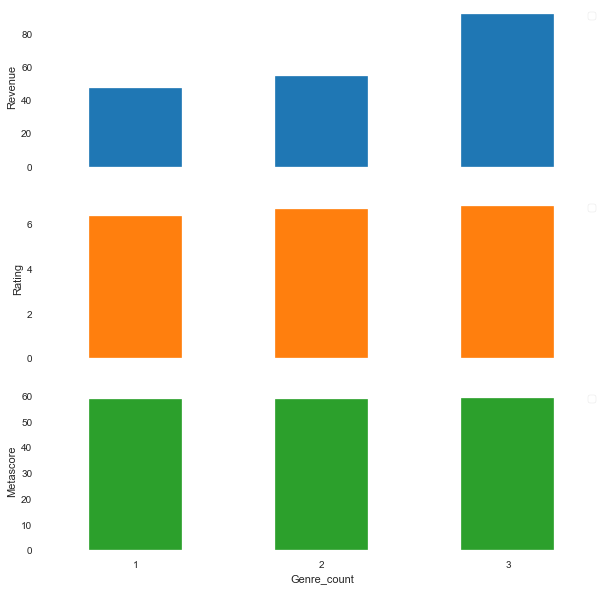

In [26]:
# Plot the results above
ax1, ax2, ax3 = genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats.index, rotation = 0.05);

In [27]:
genre_count_stats1 = movies.groupby('Genre_count')['Revenue', 'Rating', 'Metascore'].median()
genre_count_stats1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Revenue,Rating,Metascore
Genre_count,,,
1,47.985,6.4,59.5
2,42.580,6.8,59.5
3,50.010,6.9,59.5


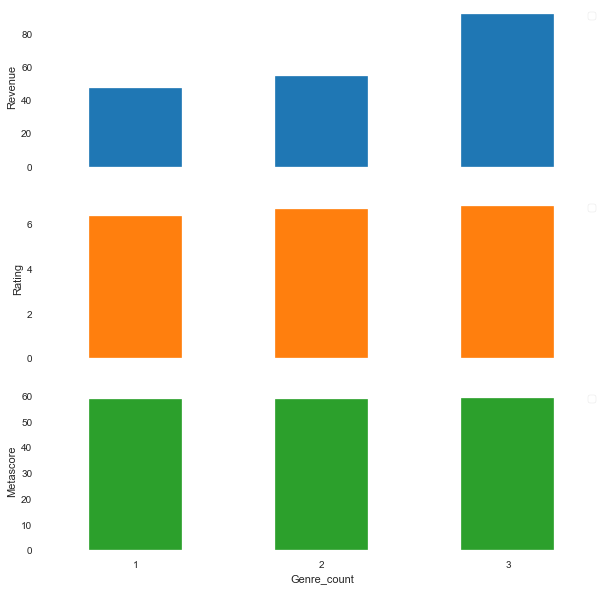

In [28]:
# Plot the results above
ax1, ax2, ax3 = genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats1.index , rotation = 0.05);

In [29]:
genre_count_stats2 = movies.groupby('Genre_count')['Revenue', 'Rating', 'Metascore'].std()
genre_count_stats2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Revenue,Rating,Metascore
Genre_count,,,
1,44.209362,1.178550,18.928195
2,72.349530,0.898739,17.265596
3,107.701542,0.906834,16.033425


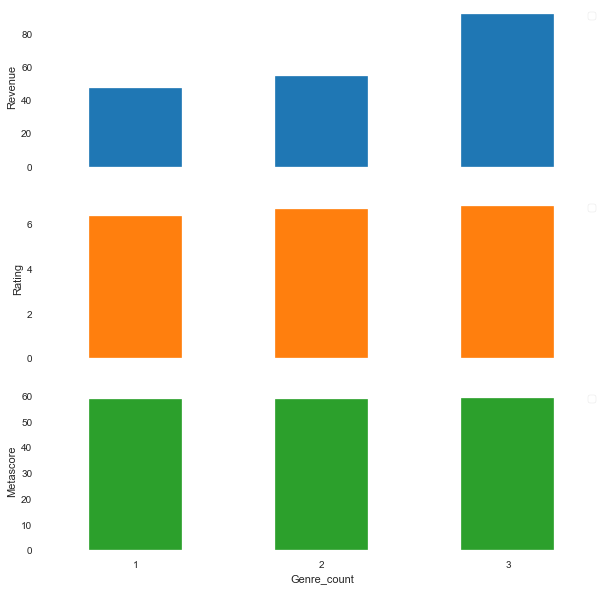

In [30]:
# Plot the results above
ax1, ax2, ax3 = genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats2.index, rotation = 0.05);

> ##### A movie with 3 Genres earn double the revenue than a movie with only 1 Genre.

#### 6.2. How much does a director matter? <a id='section602'></a>

In [31]:
# Find out the top 5 Directors by Average IMDB Rating
rating_directors = movies.groupby('Director').agg({'Rating': 'mean', 'Rank': 'count'})
top_5_rating_directors = rating_directors.rename(columns={'Revenue': 'Movies Count'}).sort_values('Rating', ascending=False)[:10]
top_5_rating_directors

,Rating,Rank
Director,,
Nitesh Tiwari,8.80,1
Christopher Nolan,8.68,5
Makoto Shinkai,8.60,1
Olivier Nakache,8.60,1
Florian Henckel von Donnersmarck,8.50,1
Aamir Khan,8.50,1
Damien Chazelle,8.40,2
Naoko Yamada,8.40,1
Rajkumar Hirani,8.30,2


In [32]:
# Find out the top 5 Directors by Average IMDB Rating
rev_directors = movies.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
top_10_rev_directors = rev_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:10]
top_10_rev_directors

,Revenue,Movies Count
Director,,
James Cameron,760.510,1
Colin Trevorrow,652.180,1
Joss Whedon,541.135,2
Lee Unkrich,414.980,1
Chris Buck,400.740,1
Chris Renaud,368.310,1
Gareth Edwards,366.415,2
Tim Miller,363.020,1
Byron Howard,341.260,1


In [33]:
# Calculate the number of movies directed by each director over the 10 year period
movies.Director.value_counts().head(10)

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Michael Bay           6
Paul W.S. Anderson    6
Justin Lin            5
Christopher Nolan     5
Danny Boyle           5
David Fincher         5
Antoine Fuqua         5
Name: Director, dtype: int64

In [34]:
# Find out the top 5 directors by Revenue
revenue_directors = movies.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:5]
top_5_revenue_directors

,Revenue,Movies Count
Director,,
James Cameron,760.510,1
Colin Trevorrow,652.180,1
Joss Whedon,541.135,2
Lee Unkrich,414.980,1
Chris Buck,400.740,1


In [35]:
movies["Revenue"].describe()

count    1000.000000
mean       78.480040
std        97.118097
min         0.000000
25%        17.442500
50%        47.985000
75%        99.177500
max       936.630000
Name: Revenue, dtype: float64

In [36]:

# Generating a list of all Directors who have directed 5 or more movies in a year
most_active_directors = movies['Director'].value_counts()[movies['Director'].value_counts() >= 5]
most_active_directors

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Michael Bay           6
Paul W.S. Anderson    6
Justin Lin            5
Christopher Nolan     5
Danny Boyle           5
David Fincher         5
Antoine Fuqua         5
Zack Snyder           5
J.J. Abrams           5
Peter Berg            5
Denis Villeneuve      5
Martin Scorsese       5
Woody Allen           5
Name: Director, dtype: int64

In [37]:
#Determine how much revenue each of these top Directors' films brought in (as a sum for each director) in millions

director_revenue_totals = np.zeros(len(most_active_directors))
i = 0
for director in most_active_directors.index:
    current_director = movies['Director'].str.contains(director).fillna(False)
    director_film_revenue = movies[current_director].xs('Revenue', axis=1).sum()
    director_revenue_totals[i] = director_film_revenue
    i += 1
    print(director, director_film_revenue)

Ridley Scott 719.06
David Yates 1630.51
M. Night Shyamalan 418.47499999999997
Michael Bay 1421.32
Paul W.S. Anderson 208.92
Justin Lin 824.79
Christopher Nolan 1515.0900000000001
Danny Boyle 183.39999999999998
David Fincher 527.72
Antoine Fuqua 393.21000000000004
Zack Snyder 975.74
J.J. Abrams 1683.4499999999998
Peter Berg 511.33
Denis Villeneuve 216.21
Martin Scorsese 458.10999999999996
Woody Allen 141.19000000000003


In [38]:
director_revenue_totals_df = pd.DataFrame(director_revenue_totals, index=most_active_directors.index, columns=['Revenue'])
director_revenue_totals_df

,Revenue
Ridley Scott,719.060
David Yates,1630.510
M. Night Shyamalan,418.475
Michael Bay,1421.320
Paul W.S. Anderson,208.920
Justin Lin,824.790
Christopher Nolan,1515.090
Danny Boyle,183.400
David Fincher,527.720
Antoine Fuqua,393.210


Text(0.5, 1.0, 'Most Active Directors % Revenue Contribution')

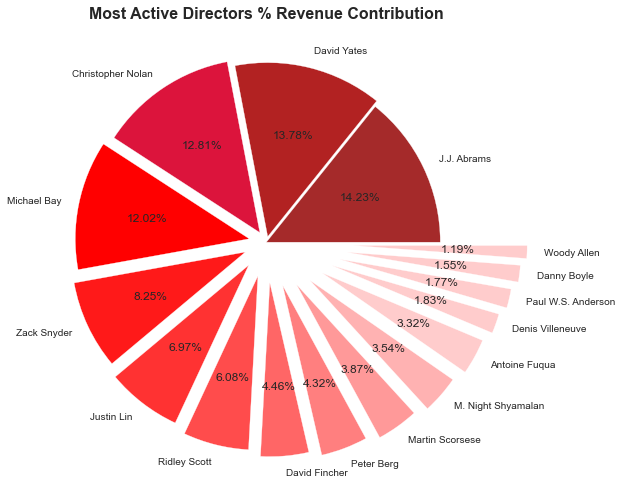

In [39]:
# Exploring the percentage of Revenue contribution from each of these top Directors
explode = np.linspace(0, 0.5, 16)
colors = ['#A52A2A','#B22222','#DC143C','#ff0000', '#ff1919','#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', '#ffb2b2', '#ffcccc','#ffcccc','#ffcccc','#ffcccc','#ffcccc',]
director_revenue_totals_df.sort_values(by='Revenue', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Most Active Directors % Revenue Contribution', weight='bold', fontsize=16)

> ##### 1. The above chart shows the total percentage revenue generated by individual Directors over the said period. JJ Abrams tops the list.
> ##### 2. Since the number of movies directed and produced are different, the total percentage revenue may not be a good figure to ascertain a Directors success. 
> ##### For instance David Yates movies have generated higher percentage of total revenue than Christopher Nolan's. However, the number of movies by David Yates is 6 while that of Christopher Nolan is 5.
> ##### 3. So we will find and work with the average revenue generated by each Director

#### 6.3 Does industry grow over years? <a id='section603'></a>

<a id='section60301'></a>
#### 6.3.1 How the number of movies increasing over the years ?

In [40]:
movies_year = movies.groupby('Year')['Rank'].count()

In [41]:
movies_year.head(11)

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Rank, dtype: int64

Text(0, 0.5, 'Movies Count')

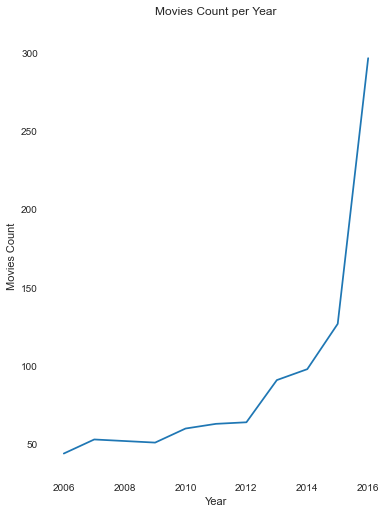

In [42]:
# Plotting the movies count per year
ax = movies_year.plot.line();
ax.set_title('Movies Count per Year', y=1.04)
ax.set_ylabel('Movies Count')

Text(0.5, 1.0, 'Movie Count by Year')

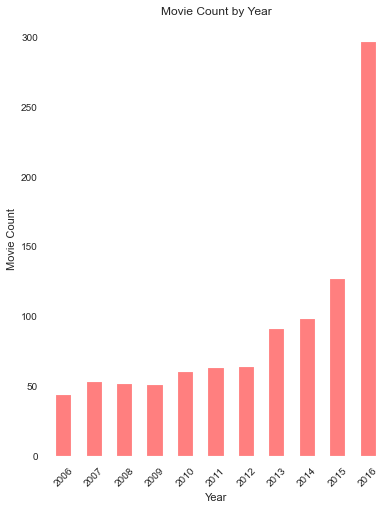

In [43]:
movie_yearly_count = movies['Year'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=45)
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

<a id='section60302'></a>
#### 6.3.2  How Revenue from movies increasing over the years ?

In [44]:
movies_revenue = movies.groupby('Year')['Revenue'].sum()

In [45]:
movies_revenue.head(11)

Year
2006     3720.430
2007     4498.170
2008     5101.205
2009     5484.200
2010     6133.605
2011     5479.945
2012     6910.290
2013     7810.675
2014     8189.340
2015     9525.910
2016    15626.270
Name: Revenue, dtype: float64

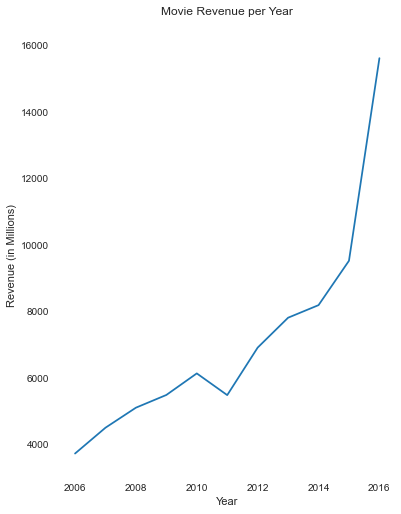

In [46]:
# Plotting the Revenue for each year
ax = movies_revenue.plot.line();
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

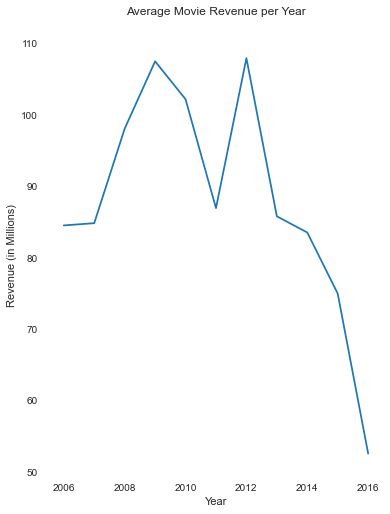

In [47]:
movies_avg_revenue = movies.groupby('Year')['Revenue'].mean()
ax = movies_avg_revenue.plot.line();
ax.set_title('Average Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

> ##### 1. Between years 2013-2016 constant uptrend in the number of movies produced is observed.
> ##### 2. 2016 has highest number of movies produced which is more than double of 2015.
> ##### 3. Even though the revenue of movies increase over years, the average revenue falls drastically year by year after 2012

## 7 Conclusion & Summarization <a id='section7'></a>

<strong>Director</strong>

1. The director who has earned the highest average revenue is James Cameron. However he has directed only 1 movie in the 10 year period.
2. Christopher Nolan's movies are the most popular among viewers as the average rating for his movies is the highest in the 10 year period. 

<strong>Runtime</strong>

1. Movies with Long runtimes (> 123 minutes) earn more in terms of Revenue, Rating and Metascore. 
2. Long runtime movies earn high Revenue. 

<strong>Genre</strong>

1. Revenue is significantly high for movies with Genre count of 3.

<strong>Industry Growth</strong>
1. Industry is growing with respect to number of movies released and the total revenue gained year on year.
2. However, the average revenue of movies year on year is showing a negative trend. This is probably because of increased competition and more movies released in the industry.


## 8 Actionable Insights <a id='section8'></a>

1. <strong>Produce movies with long runtime</strong> - Produce movies more than 123 minutes. 

2. <strong>Produce more movies</strong> - As the industry is growing fast and revenue increasing with respect to number of movies, producing more movies can earn decent revenue.

4. <strong>Produce movies with 3 Genre combination</strong> - Movie with 3 Genre can result more Revenue.